# Importing the required libraries


In [66]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load Data

In [67]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

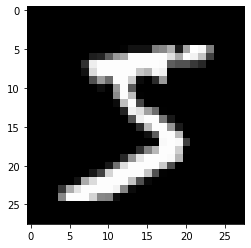

In [68]:
plt.imshow(X_train[0], cmap="gray")

In [69]:
print (y_train[0])

5


In [70]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


# Reshaping Dataset

In [71]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [72]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


# Applying One Hot Encoding


In [73]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Add CNN Layers

In [74]:
model = Sequential()

In [75]:
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

In [76]:
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

# Compiling the model


In [77]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model


In [78]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6)

Epoch 1/6
1875/1875 [==============================] - 72s 38ms/step - loss: 0.9050 - accuracy: 0.7690 - val_loss: 0.1349 - val_accuracy: 0.9616
Epoch 2/6
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2960 - accuracy: 0.9109 - val_loss: 0.0846 - val_accuracy: 0.9765
Epoch 3/6
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2165 - accuracy: 0.9362 - val_loss: 0.0699 - val_accuracy: 0.9782
Epoch 4/6
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1772 - accuracy: 0.9475 - val_loss: 0.0657 - val_accuracy: 0.9791
Epoch 5/6
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1573 - accuracy: 0.9534 - val_loss: 0.0474 - val_accuracy: 0.9841
Epoch 6/6
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1473 - accuracy: 0.9572 - val_loss: 0.0412 - val_accuracy: 0.9855


# Observing the metrics


In [80]:
# Final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.04115245118737221, 0.9854999780654907]


# Test The Model


In [81]:
prediction=model.predict(X_test[6000:6001])
print(prediction)

[[3.0498198e-11 9.8401851e-12 8.4048613e-10 2.5414380e-08 1.0057645e-03
  1.1419264e-06 2.6104384e-13 1.1989397e-05 7.9868269e-06 9.9897313e-01]]


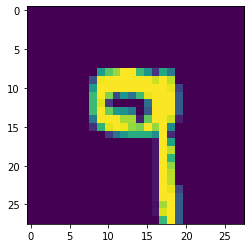

In [82]:
plt.imshow(X_test[6000])

In [83]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [ ]:
np.argmax(y_test[6000:6001]) #printing the actual labels

# Save The model


In [32]:
model.save("Digit_Recognition.h5")

In [33]:
!tar -zcvf dr.tgz Digit_Recognition.h5

Digit_Recognition.h5


In [34]:
ls -1

Digit_Recognition.h5
dr.tgz


In [35]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 9.5 MB/s eta 0:00:01


# Cloud deploy

In [36]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"ZkeaNcy_jrXtFX7W3YEbJbzZLUl-FH_ln18xj-533dLR"
    }
client=APIClient(wml_credentials)

In [37]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/6278e041c79143d5b410e1e6da91d137:31a16bb7-fbac-4def-87a2-afa01c42d3ef::',
      'guid': '31a16bb7-fbac-4def-87a2-afa01c42d3ef',
      'name': 'Watson Machine Learning-hp',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'DigitRecognition',
    'scope': {'bss_account_id': '6278e041c79143d5b410e1e6da91d137'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '9917e088-315f-4140-94d8-831431af3078',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'fc8a51aaab0a47fb8b89d70fa66d79e4',
        'api_key': 'VzXaXWKPz6MOCqfVmOSAlj-YIpAAGARIZ7VEfaGGvXxJ',
        'secret_access_key': '11bf1b8812f854ced76ee8aad0ba7d80bfa679f4fb51493b',
        'service_id': 'ServiceId-4ac94374-2f6f-457f-9c3e-b15f78a9191f'},
       'editor': {'access_key_id': '503f30283f7847159d6bc377f1f878ee',
        'api

In [38]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [39]:
space_uid = guid_from_space_name(client,'DigitRecognition')
print("Space UID = " + space_uid)

Space UID = cd350261-cca8-457c-9a97-43cec1147b2e


In [40]:
client.set.default_space(space_uid)

'SUCCESS'

In [41]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [42]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [43]:
model_details = client.repository.store_model(model='dr.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"DigitRecognition",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})
model_id = client.repository.get_model_id(model_details)

In [44]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-17T18:07:53.734Z',
  'id': 'c03ac684-dac8-40b2-b0b1-f9b41bac179d',
  'modified_at': '2022-11-17T18:07:57.183Z',
  'name': 'DigitRecognition',
  'owner': 'IBMid-668000FRGT',
  'resource_key': '3b65ab66-cd12-428a-be3b-8ace9461ac56',
  'space_id': 'cd350261-cca8-457c-9a97-43cec1147b2e'},
 'system': {'warnings': []}}

In [45]:
model_id = client.repository.get_model_id(model_details)
model_id

'c03ac684-dac8-40b2-b0b1-f9b41bac179d'

In [46]:
client.repository.download(model_id,'DigitRecognition_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecognition_IBM_model.tar.gz'


'/home/wsuser/work/DigitRecognition_IBM_model.tar.gz'

In [47]:
ls

Digit_Recognition.h5  DigitRecognition_IBM_model.tar.gz  dr.tgz


# Test Model
 

In [65]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [49]:
model = load_model("Digit_Recognition.h5")

In [57]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jCbTP4ZC3go1MolmJHxGsoZvQm_Gi_HcJ2g6bOc3EAAX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitrecognition-donotdelete-pr-ngwz8ymnmeoaxw'
object_key = 'five.jpeg'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [58]:
img = Image.open(streaming_body_2).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [59]:
img

In [60]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [61]:
pred = model.predict(im2arr)
print(pred)

[[1.7334506e-12 6.7736166e-15 3.7026433e-14 7.1060470e-07 9.8992958e-12
  9.9999881e-01 3.4682244e-09 1.8305019e-11 4.0552543e-08 4.1162744e-07]]


In [62]:
print(np.argmax(pred, axis=1)) #printing our Labels

[5]
